In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from sklearn.datasets import make_classification
from DecisionTree import decision_tree
%matplotlib inline

importing Jupyter notebook from DecisionTree.ipynb
0.9


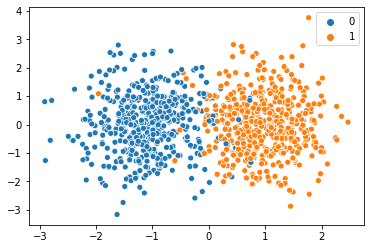

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

In [3]:
class RandomForest:
    def __init__(self,n_estimators=10 ,impurity="entropy",n_features=1):
        self.n_estimators=n_estimators
        self.estimators=[decision_tree() for _ in range(n_estimators)]
        self.impurity=impurity
        self.n_features=n_features

    def train(self,x,y,threshold_impurity=0.1,max_depth=100):
        for estimator in range(self.n_estimators):
            self.estimators[estimator].fit(x,y,threshold_impurity=threshold_impurity,max_depth=max_depth,random_picking=True)
    def predict(self,x):
        results=np.array([self.estimators[estimator].predict(x) for estimator in range(self.n_estimators)]).T
        predictions=[]
        for i in results:
            (values,counts) = np.unique(i,return_counts=True)
            predictions.append(values[np.argmax(counts)])
        return np.array(predictions)
            

In [4]:
model=RandomForest()
model.train(x,y)


In [5]:
prediction=model.predict(x_test)

In [6]:
print((len(y_test)-sum(abs(prediction-y_test)))/len(y_test))

0.962


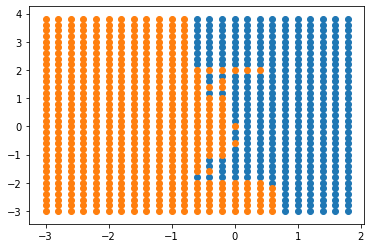

In [7]:
one1=[]
zero1=[]
one2=[]
zero2=[]
for i in np.arange(-3,2,0.2):
    for j in np.arange(-3,4,0.2):
        l=model.predict(np.array([[i,j]]))[0]
        if(l==1):
            one1.append(i)
            one2.append(j)
        else:
            zero1.append(i)
            zero2.append(j)
plt.scatter(np.array(one1),np.array(one2))
plt.scatter(np.array(zero1),np.array(zero2))